In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
'C:/DL/tomato',
    shuffle=True,
    image_size=(256,256),
    batch_size=64


)

Found 16011 files belonging to 10 classes.


In [3]:
class_names=dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(dataset)

251

In [83]:
print(dataset.take(1))

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


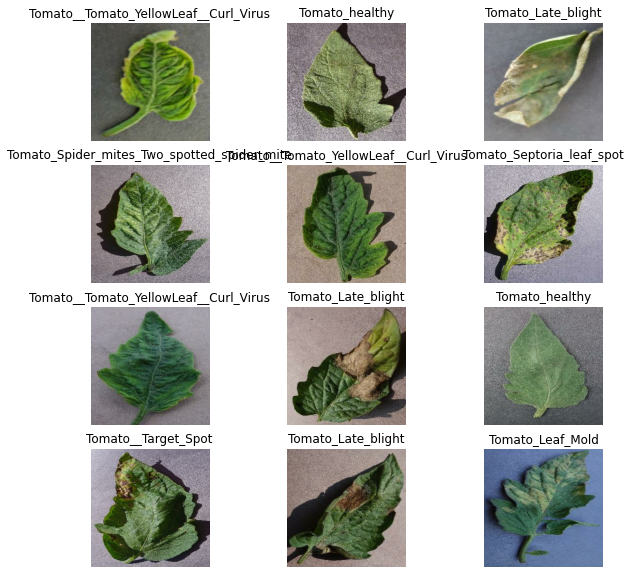

In [31]:
for image_batch,label_batch in dataset.take(1):
    plt.figure(figsize=(10,10))
    for i in range(12):
        a=plt.subplot(4,3,i+1)
        
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [4]:
def splitting_dataset(ds, train_split=0.8,val_split=0.1,test_split=0.1 ):
    train_size=int((len(ds))*train_split)
    val_size=int((len(ds))*val_split)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [5]:
train_ds, val_ds, test_ds=splitting_dataset(dataset)

In [6]:
len(train_ds)

200

In [35]:
len(val_ds)

25

In [36]:
len(test_ds)

26

In [7]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256, 256),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [9]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [10]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomCrop(256,256),
  layers.experimental.preprocessing.RandomZoom(0.2),
])


In [11]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [12]:
input_shape = (64, 256, 256, 3)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [59]:
model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (64, 254, 254, 64)        1792      
                                                                 
 max_pooling2d_36 (MaxPoolin  (64, 127, 127, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (64, 125, 125, 64)        36928     
                                                                 
 max_pooling2d_37 (MaxPoolin  (64, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (64, 60, 60, 64)        

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


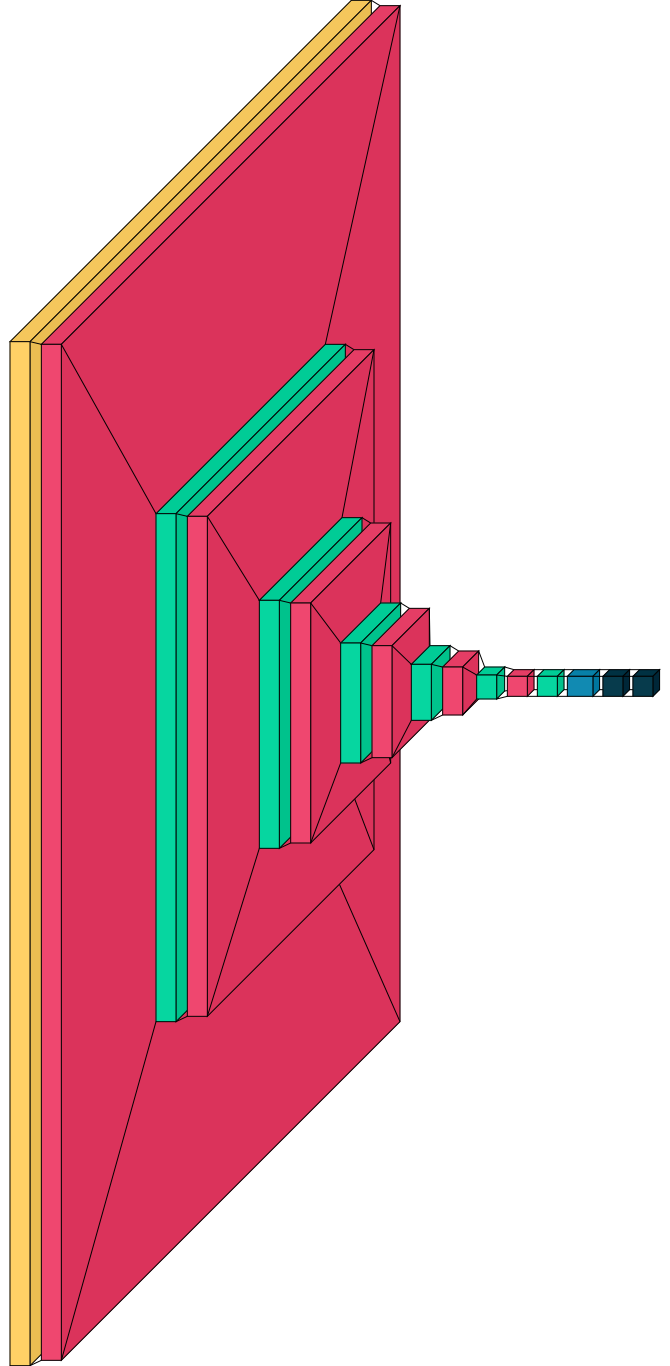

In [15]:
import visualkeras
visualkeras.layered_view(model)

In [61]:
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
200/200 [==============================] - 891s 4s/step - loss: 1.7806 - accuracy: 0.3602 - val_loss: 1.3325 - val_accuracy: 0.5200
Epoch 2/20
200/200 [==============================] - 810s 4s/step - loss: 1.1374 - accuracy: 0.6081 - val_loss: 1.3923 - val_accuracy: 0.5650
Epoch 3/20
200/200 [==============================] - 932s 5s/step - loss: 0.8785 - accuracy: 0.6951 - val_loss: 1.3452 - val_accuracy: 0.6125
Epoch 4/20
200/200 [==============================] - 1108s 6s/step - loss: 0.6387 - accuracy: 0.7752 - val_loss: 0.8932 - val_accuracy: 0.7038
Epoch 5/20
200/200 [==============================] - 980s 5s/step - loss: 0.5244 - accuracy: 0.8130 - val_loss: 1.0224 - val_accuracy: 0.6837
Epoch 6/20
200/200 [==============================] - 975s 5s/step - loss: 0.4312 - accuracy: 0.8520 - val_loss: 0.5802 - val_accuracy: 0.8056
Epoch 7/20
200/200 [==============================] - 830s 4s/step - loss: 0.3886 - accuracy: 0.8622 - val_loss: 0.5135 - val_accuracy: 0.824

In [62]:
scores = model.evaluate(test_ds)


26/26 [==============================] - 37s 719ms/step - loss: 0.4647 - accuracy: 0.8684


In [63]:
scores

[0.46470269560813904, 0.868404746055603]

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

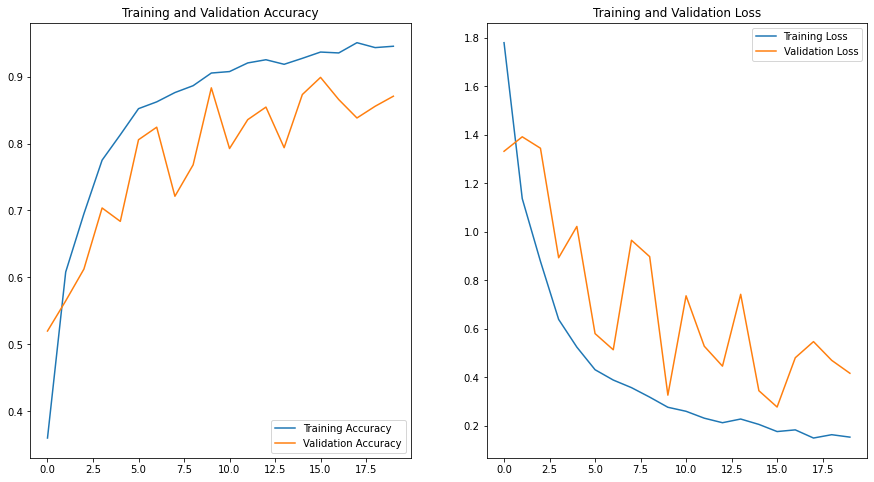

In [71]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_Late_blight
2/2 [==============================] - 1s 384ms/step
predicted label: Tomato_Late_blight


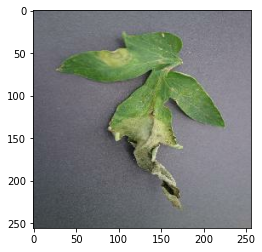

In [72]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    for i in range(12):
        image= image_batch[i].numpy().astype('uint8')
        label=label_batch[i].numpy().astype('uint8')
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [73]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 45ms/step


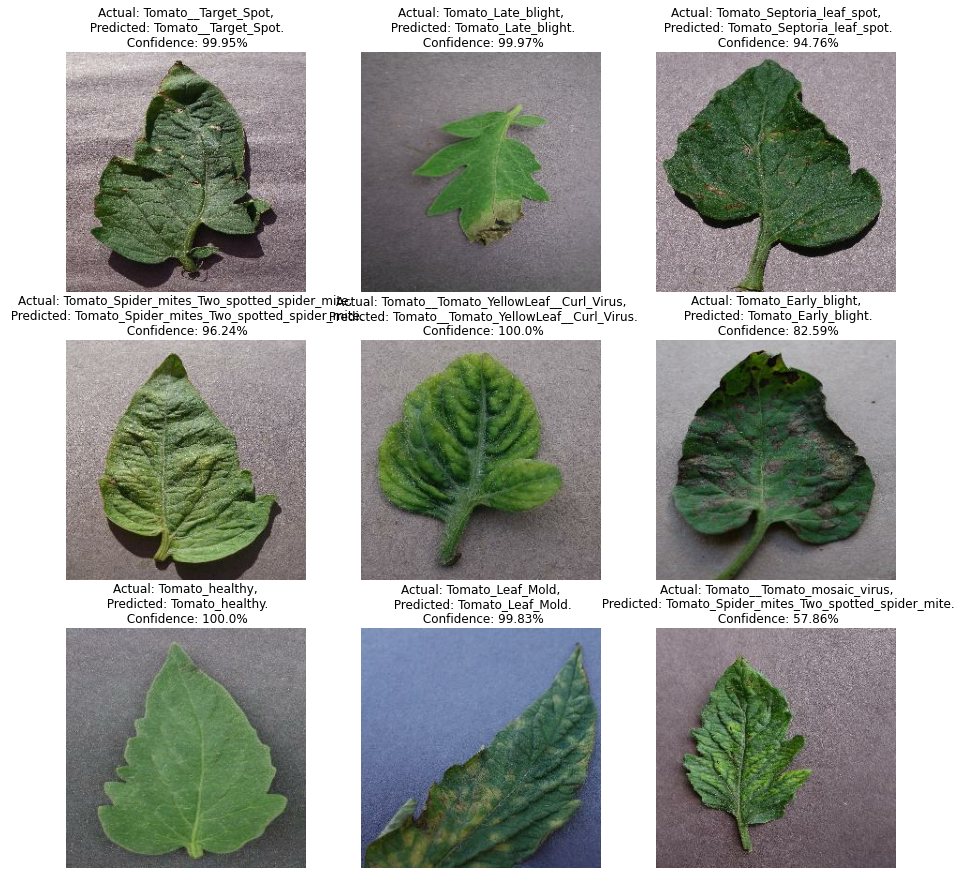

In [74]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")